In [14]:
import torch
import numpy as np
import math

# Difference estimation results on training dataset and test dataset

## On one sample of the training dataset

In [43]:
sigma_inverse = torch.from_numpy(np.array([[341.9544, -44.3689],
         [-44.3689, 205.4515]]))
pred = torch.from_numpy(np.array([-20.2327, -33.8254]))
gt = torch.from_numpy(np.array([-20.2017, -33.8385]))
covar_matrix = torch.linalg.inv(sigma_inverse)
predicted_multivariate_normal_dists = torch.distributions.multivariate_normal.MultivariateNormal(pred, covariance_matrix = covar_matrix)

negative_log_prob = - \
        predicted_multivariate_normal_dists.log_prob(gt)
print("NLL: {}".format(negative_log_prob))
print("covar_matrix: {}".format(covar_matrix))
print("predict diff: {}".format(gt-pred))
diff = torch.unsqueeze(gt-pred, 0)
reg = torch.matmul(diff, sigma_inverse)
reg = 0.5*torch.matmul(reg, torch.transpose(diff, 0, 1))
print(reg)

NLL: -3.527900150652841
covar_matrix: tensor([[0.0030, 0.0006],
        [0.0006, 0.0050]], dtype=torch.float64)
predict diff: tensor([ 0.0310, -0.0131], dtype=torch.float64)
tensor([[0.2000]], dtype=torch.float64)


## On one sample of the test dataset

In [44]:
sigma_inverse = torch.from_numpy(np.array([[287.6793, -36.8457],
         [-36.8457, 453.8144]]))
pred = torch.from_numpy(np.array([-14.3089, -30.2196]))
gt = torch.from_numpy(np.array([-14.4648, -29.6471]))
covar_matrix = torch.linalg.inv(sigma_inverse)
predicted_multivariate_normal_dists = torch.distributions.multivariate_normal.MultivariateNormal(pred, covariance_matrix = covar_matrix)

negative_log_prob = - \
        predicted_multivariate_normal_dists.log_prob(gt)
print("NLL: {}".format(negative_log_prob))
print("covar_matrix: {}".format(covar_matrix))
print("predict diff: {}".format(gt-pred))
diff = torch.unsqueeze(gt-pred, 0)
reg = torch.matmul(diff, sigma_inverse)
reg = 0.5*torch.matmul(reg, torch.transpose(diff, 0, 1))
print(reg)

NLL: 77.10816480498718
covar_matrix: tensor([[0.0035, 0.0003],
        [0.0003, 0.0022]], dtype=torch.float64)
predict diff: tensor([-0.1559,  0.5725], dtype=torch.float64)
tensor([[81.1548]], dtype=torch.float64)


0.0009118819655545162

In [29]:
- (2.9173 + 2.6484) + 0.3998/2 + np.log(2*math.pi)/2

-4.446861466795326

In [42]:
diff = gt - pred
diff = torch.unsqueeze(diff, 0)
print(diff)
reg = torch.matmul(diff, sigma_inverse)
reg = 0.5*torch.matmul(reg, torch.transpose(diff, 0, 1))
print(reg)
norm = 0.5 * np.log(torch.det(covar_matrix))
print(norm)
print(reg + norm + np.log(2*math.pi)/2)

tensor([[-0.1559,  0.5725]], dtype=torch.float64)
tensor([[81.1548]], dtype=torch.float64)
tensor(-5.8845, dtype=torch.float64)
tensor([[76.1892]], dtype=torch.float64)


In [11]:
a[0][[1,3]]

array([[2, 3],
       [6, 7]])

In [4]:
inv = np.array([[5097.7979, -437.9164],
         [-437.9164, 3693.5437]])
ma = np.linalg.inv(inv)
print(np.linalg.inv(inv))
print(np.matmul(inv, ma))

[[1.98181590e-04 2.34969383e-05]
 [2.34969383e-05 2.73528561e-04]]
[[1.00000000e+00 4.67238931e-18]
 [3.04911893e-18 1.00000000e+00]]


In [7]:
np.sqrt(0.0369)*0.25

0.04802343178074637

In [2]:
pred_diff = np.array([6.1858e-04, 1.0821e-03, 6.4980e-03, 3.8443e-03, 1.4177e-04, 6.7441e-05,
        8.7563e-03, 1.3929e-03])
cov = np.array([-5.5067, -5.5892, -5.5086, -5.5608, -5.5949, -5.5972, -5.5694, -5.5734])

In [8]:
loss = pred_diff * np.exp(-cov) + cov/2
print(loss)
print(np.exp(cov))
print(np.exp(-cov))

[-2.60097094 -2.50511497 -1.15055879 -1.78076368 -2.75930668 -2.78041317
 -0.48812665 -2.41991058]
[0.00405948 0.00373802 0.00405178 0.0038457  0.00371677 0.00370823
 0.00381277 0.00379755]
[246.33687261 267.52151687 246.80535758 260.03077776 269.05074367
 269.67027257 262.27668601 263.32789377]


In [19]:
covar_matrix = torch.zeros((2, 4, 2, 2))
pred = torch.ones((2, 4, 3))

sumV = torch.sum(pred[:, :, 0])
sumV += torch.sum(pred[:, :, 2])

covar_matrix[:, :, 0, 0] = torch.exp(pred[:, :, 0])
covar_matrix[:, :, 0, 1] = pred[:, :, 1]
covar_matrix[:, :, 1, 1] = torch.exp(pred[:, :, 2])

print(covar_matrix)
print(sumV)

tensor([[[[2.7183, 1.0000],
          [0.0000, 2.7183]],

         [[2.7183, 1.0000],
          [0.0000, 2.7183]],

         [[2.7183, 1.0000],
          [0.0000, 2.7183]],

         [[2.7183, 1.0000],
          [0.0000, 2.7183]]],


        [[[2.7183, 1.0000],
          [0.0000, 2.7183]],

         [[2.7183, 1.0000],
          [0.0000, 2.7183]],

         [[2.7183, 1.0000],
          [0.0000, 2.7183]],

         [[2.7183, 1.0000],
          [0.0000, 2.7183]]]])
tensor(16.)


In [17]:
diff = torch.ones((2, 4, 1,2))
torch.matmul(torch.matmul(diff, covar_matrix), torch.transpose(diff, 2, 3)).shape

torch.Size([2, 4, 1, 1])

In [3]:
covar_matrix = np.array([[[ 1.0905,  0.0474],
         [ 0.0000,  3.3625]],

        [[ 1.5273, -0.3425],
         [ 0.0000,  1.2889]],

        [[ 0.3197,  0.1894],
         [ 0.0000,  1.4496]],

        [[ 0.4454,  1.1427],
         [ 0.0000,  1.1454]]])
pred_diff = np.array([[[-0.0059,  0.0224]],

        [[-0.0080,  0.0203]],

        [[-0.0130,  0.0519]],

        [[-0.0108,  0.0540]]])

In [14]:
np.transpose(covar_matrix,[0,2,1])

array([[[ 1.0905,  0.    ],
        [ 0.0474,  3.3625]],

       [[ 1.5273,  0.    ],
        [-0.3425,  1.2889]],

       [[ 0.3197,  0.    ],
        [ 0.1894,  1.4496]],

       [[ 0.4454,  0.    ],
        [ 1.1427,  1.1454]]])

In [12]:
sigma_inverse = np.matmul(np.transpose(covar_matrix,[0,2,1]), covar_matrix)
print(sigma_inverse)

[[[ 1.18919025  0.0516897 ]
  [ 0.0516897  11.30865301]]

 [[ 2.33264529 -0.52310025]
  [-0.52310025  1.77856946]]

 [[ 0.10220809  0.06055118]
  [ 0.06055118  2.13721252]]

 [[ 0.19838116  0.50895858]
  [ 0.50895858  2.61770445]]]


In [15]:
np.matmul(np.matmul(pred_diff, sigma_inverse), np.transpose(pred_diff, [0,2,1]))

array([[[0.00570196]],

       [[0.00105212]],

       [[0.00569238]],

       [[0.00706272]]])

In [25]:
np.matmul(np.matmul(pred_diff.T, pred_diff), sigma_inverse)

array([[ 0.09976136,  0.12798164,  0.17835988,  0.17479777,  0.04085993,
        -0.54958705],
       [ 0.38615724,  0.49539258,  0.69039716,  0.67660893,  0.15816103,
        -2.12734694],
       [ 0.07315833,  0.0938532 ,  0.13079724,  0.12818503,  0.02996395,
        -0.4030305 ],
       [ 0.18193766,  0.2334038 ,  0.32528005,  0.31878374,  0.07451744,
        -1.00229774],
       [ 0.0363725 ,  0.04666148,  0.06502914,  0.06373041,  0.01489733,
        -0.20037675],
       [-0.46025495, -0.59045088, -0.82287388, -0.8064399 , -0.18850972,
         2.53555247]])

In [31]:
0.1424*np.exp(1.34+1.34)*0.1424

0.2957530214314797

In [44]:
c = torch.tensor([ 0.0682, -0.0676,  0.0153, -0.0472,  0.0210, -0.0660, -0.0602,  0.0129] , dtype= torch.float)
torch.sqrt(torch.sum(c))

tensor(nan)

In [46]:
a = torch.tensor([[-19.4178, -32.5698],
        [-19.6267, -32.2309],
        [-19.0077, -31.8494],
        [-18.7988, -32.1883]])
b = torch.tensor([[-17.9509, -31.7527],
        [-19.4319, -31.7537],
        [-19.4334, -29.5464],
        [-17.9524, -29.5454]])
b - a

tensor([[ 1.4669,  0.8171],
        [ 0.1948,  0.4772],
        [-0.4257,  2.3030],
        [ 0.8464,  2.6429]])

In [47]:
0.8171 * 0.8171 / 2

0.33382620500000004

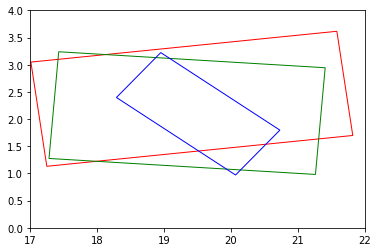

In [8]:
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

my_quad_center = Polygon([(20.72872543,   1.79706585), (20.06682777,   0.97120333), (18.28781128,   2.39701843), (18.94970894,   3.22288084)], color='b')
my_tri  = Polygon([(0,1), (1,1), (0.5,2),])
my_quad_origin = Polygon([(21.40514755,   2.94450998), (21.26015663,   0.98168457), (17.28078461,   1.27563572), (17.42577553,   3.23846102)], color='g')
my_quad_annotation = Polygon([(21.57969175,   3.61527827), (21.81752555,   1.69838214), (17.24805178,   1.1314368), (17.01021798,   3.04833293)], color='r')
fig, ax = plt.subplots(1,1)

c = ax.add_patch( my_quad_annotation )
a = ax.add_patch( my_quad_origin )
a.set_fill(False)
c.set_fill(False)
b = ax.add_patch( my_quad_center )
b.set_fill(False)


plt.ylim(0,4)
plt.xlim(17,22)

plt.show()